In [14]:
#%pip install matplotlib numpy pandas

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------- ----------------------- 112.6/293.3 kB 3.2 MB/s eta 0:00:01
     ------------------------------- ------ 245.8/293.3 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


For the prepartion, let's begin by importing the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Next, import the dataset then take a quick look at the data and the structure of the data.

In [3]:
myData = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
myData.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
myData.info()
myData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


#### Great! Time to process and clean the data. 
Some possible areas that need to be cleaned:
- There are null values in columns "in_shazam_charts" and "key", will remove the entire row that includes any null values.<br>
- The "streams", "in_deezer_playlists" and "in_shazam_charts" columns should be of number datatype so converting it into int64 type.<br>
<br>


Dropping entries with null values:

In [5]:
myData.dropna(inplace=True)
myData.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Clearing duplicates

In [6]:
duplicates = myData[myData.duplicated(keep=False)]
num_duplicates = duplicates.shape[0]
print(f"Duplicate entries: {num_duplicates}")

Duplicate entries: 0


No duplicates. Now, the "streams", "in_deezer_playlists" and "in_shazam_charts" columns should be a number so converting it into integer type.<br>
While we're at it, let's also remove any non-numeric values in columns that are supposed to have numbers only.

In [7]:
myData = myData[~myData['streams'].str.contains(r'[^0-9]', regex = True, na = False)]
myData['streams'] = myData['streams'].astype('int64')
myData['in_deezer_playlists'] = myData['in_deezer_playlists'].str.replace(r'[^0-9]', '', regex = True).astype('int64')
myData['in_shazam_charts'] = myData['in_shazam_charts'].str.replace(r'[^0-9]', '', regex = True).astype('int64')

#### EDA
Time to answer our questions with some visualizations!

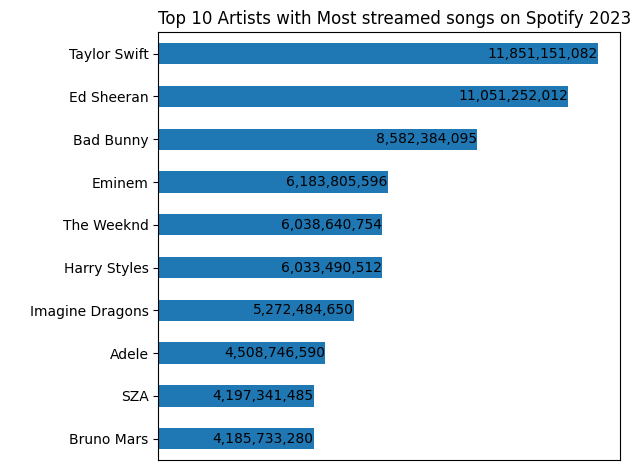

In [8]:
grouped_df = myData.groupby('artist(s)_name').sum().reset_index()                           #grouping artist names then add their total streams
grouped_df['streams_formatted'] = grouped_df['streams'].apply(lambda x: '{:,}'.format(x))   #make new column for stream count but add number format with commas for better readability
grouped_df = grouped_df.sort_values(by='streams', ascending=False).head(10)                 #sorting data by total stream, descending order
grouped_df = grouped_df.sort_values(by='streams')                                           #sort again, highest streams will be in bottom but they will be plotted at the top in the chart, because pandas
ax = grouped_df.plot(kind = 'barh', x = 'artist(s)_name', y = 'streams', legend = False)    #save the plot to variable for use later
                                                                                            
for index, (value, formatted_value) in enumerate(zip(grouped_df['streams'], grouped_df['streams_formatted'])):  #iterate through all values to make the stream count embedded into the bars
    text_position = value
    ax.text(text_position, index, formatted_value, color='black', va='center', ha='right')

ax.set_title('Top 10 Artists with Most streamed songs on Spotify 2023', x = 0, ha = 'left') 
plt.ylabel(' ')
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()

#### Top 10 Artists with Most streamed songs on Spotify 2023
Taylor Swift is the most streamed artist in Spotify for 2023 at a staggering 11.8 billion streams <br>
Followed by Ed Sheeran at 11 billion <br>
Then by Bad Bunny at 8.5 billion<br>
Eminem at 6.1 billion<br>
The Weeknd at 6 billion<br>
Harry Styles at 6 billion <br>
Imagine Dragons at 5.2 billion<br>
Adele at 4.5 billion<br>
SZA at 4.1 billion<br>
Bruno Mars at 4.1 billion<br>

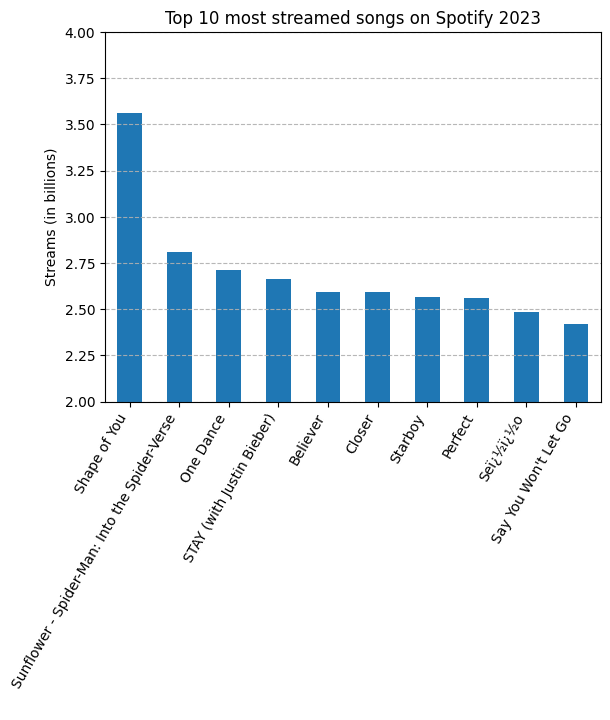

In [9]:
format_df = myData
format_df['streams_formatted'] = myData['streams'] / 1e9
format_df = format_df.sort_values(by='streams', ascending=False).head(10)
ax = format_df.plot(kind = 'bar', y = 'streams_formatted', x = 'track_name', legend = False)
ax.set_title('Top 10 most streamed songs on Spotify 2023')
plt.gca().set_ylim(2, 4)
plt.xlabel(' ')
plt.xticks(rotation = 60, ha = 'right')
plt.ylabel('Streams (in billions)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

#### Top 10 most streamed songs on Spotify 2023
Shape of You by Ed Sheeran takes the #1 spot on the most streamed Spotify song in 2023 at 3.56 billion<br>
Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee at 2.8 billion<br>
One Dance by Drake, WizKid, Kyla at 2.71 billion<br>
STAY (with Justin Bieber) by Justin Bieber, The Kid Laroi at 2.66 billion<br>
Believer by Imagine Dragons at 2.59 billion<br>
Closer by The Chainsmokers, Halsey t 2.59 billion<br>
Starboy by The Weeknd, Daft Punk at 2.56 billion<br>
Perfect by Ed Sheeran at 2.56 billion<br>
Seï¿½ï¿½o by Shawn Mendes, Camila Cabello at 2.48 billion<br>
Say You Won't Let Go by James Arthur at 2.42 billion<br>

Though Ed Sheeran have 2 songs in the top 10 most streamed and none of Taylor Swift's songs made it here given that she's the most streamed artist on Spotify 2023.<br>
This suggests that Taylor Swift have multiple songs with a huge number of streams or Ed Sheeran have a few songs but majority of them are big hits.

With this in mind, how does the total number of songs correlate to an artist's total number of streams?

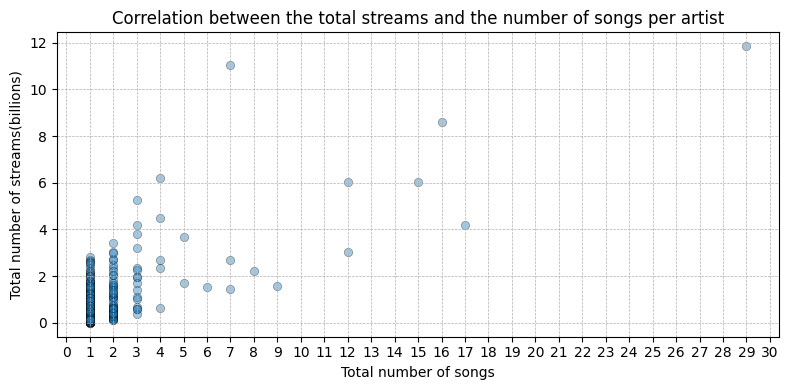

In [10]:
total_streams = myData.groupby('artist(s)_name')['streams'].sum() / 1e9     #combining data by artists and sum their total streams
total_songs = myData.groupby('artist(s)_name').size()                       #total count of songs by the artist
combined_df = pd.DataFrame({                                                #combine again for use in the scatterplot
    'total_streams' : total_streams,
    'total_songs': total_songs
}).reset_index()
plt.figure(figsize=(8, 4))
plt.scatter(combined_df['total_songs'], combined_df['total_streams'], alpha = 0.4, edgecolors = 'k', linewidth = 0.5)
plt.title('Correlation between the total streams and the number of songs per artist')
plt.xlabel('Total number of songs')
plt.xticks(range(0, 31, 1))
plt.ylabel('Total number of streams(billions)')
plt.grid(True, which = 'both', ls = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

The chart appears to be suggesting a positive correlation but it may be difficult to discern due to the sheer amount of artists with only 1 or 2 songs. In this case, we'll try to compare it directly using correlation coefficient.

The resulting value is defined as:
- A value closer to 1 means a strong positive correlation 
- A value close to -1 is negative correlation
- A value near 0 means very little or no linear correlation.

In [11]:
corr = combined_df['total_songs'].corr(combined_df['total_streams'])
print(f"Correlation coefficient: {corr: .2f}")

Correlation coefficient:  0.73


We got a 0.73 which is closer to 1 so this suggests, along with the chart, that the total number of songs has a positive correlation to the total number of streams.<br><br>


#### Next, we have the following song characteristics and their definition ♬♪♩♫: 
- __Danceability__: refers to how suitable a track is for dancing.
- __Valence__: refers to the musical positiveness conveyed by a track. Songs with high valence sound more positive (happy, cheerful, euphoric), while songs with low valence sound more negative (sad, depressed, angry).
- __Energy__: refers to the intensity and activity present in a track. It's a measure of how fast, loud, and noisy a song sounds as opposed to being slow, soft, and smooth.
- __Acousticness__: refers to the extent to which a track sounds acoustic as opposed to electronic.
- __Instrumentalness__: refers to the likelihood that a track contains no vocal content. It's a measure used to distinguish purely instrumental tracks from those with vocals.
- __Liveness__: refers to the presence of an audience in the recording. It's a measure that seeks to identify tracks that are recorded live, as opposed to studio recordings. 
- __Speechiness__: refers to the presence of spoken words in the track. It's a measure that differentiates between tracks that are more talkative, like talk shows, podcasts, or spoken word performances, and tracks that are purely musical.<br><br>

In the following section, we'll explore the distribution of various song characteristics. Specifically, we'll visualize how frequently songs exhibit certain percentages of each characteristic.

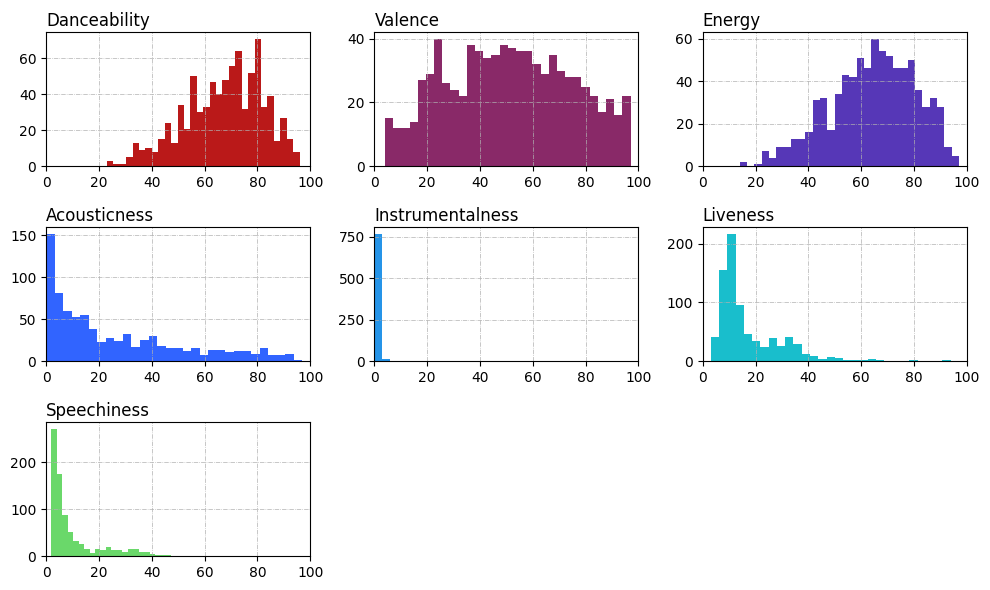

In [12]:
#columns to use
song_char = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
chart_title = ['Danceability', 'Valence', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
chart_colors = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a"]

#setting up subplots grids
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 6)) 
axes_flat = axes.flatten()

#iteration to fill up each histogram
for i, col in enumerate(song_char):
    axes_flat[i].hist(myData[col], bins = 30, alpha = 0.9, color = chart_colors[i])
    axes_flat[i].set_title(' ')
    axes_flat[i].set_xlim([0, 100])
    axes_flat[i].grid(True, which = 'both', ls = '-.', lw = 0.5)
    axes_flat[i].text(0, 1.15, chart_title[i], transform=axes_flat[i].transAxes, fontsize=12, verticalalignment='top')

#clean the empty subplot grid
axes_flat[-1].axis('off')
axes_flat[-2].axis('off')

plt.tight_layout()
plt.show()



Using this visualization, here's our findings:

- Many songs in the dataset have high danceability scores, suggesting a preference for danceable tracks.
- Valence is spread out, indicating a variety of moods in the songs, from sad to happy.
- A significant portion of songs exhibit high energy, which might correlate with the danceability observation.
- The low acousticness in most songs suggests a preference for electronically produced tracks over purely acoustic ones.
- Instrumentalness is low for the vast majority, indicating that fully instrumental tracks are less common.
- The low liveness scores in most songs likely point to studio recordings rather than live performances.
- Low speechiness in most tracks suggests that pure speech or spoken-word tracks are less common, and melodic content dominates.

Next, let's explore the distribution of the song's tempo. Tempo, often measured in Beats Per Minute (BPM), represents the speed or pace of a song.